In [26]:
import pandas as  pd 
import plotly.express as px
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [27]:
fifa_df=pd.read_csv("CompleteDataset.csv")

C:\Users\jimv6\AppData\Local\Temp\ipykernel_17948\2634026765.py:1: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df=pd.read_csv("CompleteDataset.csv")


 Removing Positionwise OVR

In [28]:
players_data=fifa_df.drop(['Unnamed: 0','Photo', 'Flag','Club Logo', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],axis=1)

Function to remove certain character data from the Number values

In [29]:
import re

def extract_numeric_value(data):


    match = re.search(r'(\d+)', data) 
    if match:
        return int(match.group(1))
    else:
        return None

In [30]:
for item in ['Acceleration','Aggression','Agility','Balance','Ball control','Composure','Crossing','Curve','Dribbling','Finishing','GK diving','GK handling','GK kicking','GK positioning','GK reflexes','Heading accuracy','Interceptions','Jumping','Long passing','Long shots','Marking','Positioning','Reactions','Short passing','Shot power','Sliding tackle','Sprint speed','Stamina','Standing tackle','Strength','Vision','Volleys','Free kick accuracy','Penalties']:
    players_data[item] = players_data[item].astype('str')
    players_data[item] = players_data[item].apply(lambda x: extract_numeric_value(x))
    players_data[item] = players_data[item].astype('int64')
    


Convert currency format to numeric

In [31]:
def clean_currency_value(val):
    if val[-1]=='M':
        return(float(val[1:-1])*1000000)
    elif val[-1]=='K':
        return(float(val[1:-1])*1000)
    else:
        return(float(val[1:]))



In [32]:
players_data['Value']=players_data['Value'].apply(lambda x:clean_currency_value(x))
players_data['Wage']=players_data['Wage'].apply(lambda x:clean_currency_value(x))

Select the first Preffered Position as Default Position

In [33]:
players_data['Position']=players_data['Preferred Positions'].apply(lambda x:x.split()[0])

Set Player Category based on position

In [34]:
player_categories={'GK':['GK'],
                   'DEF':['CB','LB','RB', 'RWB', 'LWB'],
                   'ATT':['ST', 'RW', 'LW','CF'],
                   'MID':['CDM', 'RM', 'CM', 'LM','CAM']
                   }

In [35]:
def set_category(pos):
    for key,value in player_categories.items():
        if pos in value:
            return key

In [36]:
players_data['Category']=players_data['Position'].apply(lambda x:set_category(x))

In [37]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 17981 non-null  object 
 1   Age                  17981 non-null  int64  
 2   Nationality          17981 non-null  object 
 3   Overall              17981 non-null  int64  
 4   Potential            17981 non-null  int64  
 5   Club                 17733 non-null  object 
 6   Value                17981 non-null  float64
 7   Wage                 17981 non-null  float64
 8   Special              17981 non-null  int64  
 9   Acceleration         17981 non-null  int64  
 10  Aggression           17981 non-null  int64  
 11  Agility              17981 non-null  int64  
 12  Balance              17981 non-null  int64  
 13  Ball control         17981 non-null  int64  
 14  Composure            17981 non-null  int64  
 15  Crossing             17981 non-null 

In [38]:
players_data.nunique()

Name                   16975
Age                       29
Nationality              165
Overall                   49
Potential                 48
Club                     647
Value                    207
Wage                     142
Special                 1396
Acceleration              86
Aggression                85
Agility                   83
Balance                   83
Ball control              88
Composure                 85
Crossing                  87
Curve                     86
Dribbling                 93
Finishing                 92
Free kick accuracy        88
GK diving                 76
GK handling               72
GK kicking                84
GK positioning            78
GK reflexes               75
Heading accuracy          91
Interceptions             89
Jumping                   74
Long passing              85
Long shots                89
Marking                   88
Penalties                 87
Positioning               93
Reactions                 67
Short passing 

In [39]:
players_data = players_data.drop(['Name','Nationality', 'Club', 'Preferred Positions'], axis = 1)


In [40]:
players_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,17981.0,2.514454e+01,4.614272e+00,16.0,21.0,25.0,28.0,47.0
Overall,17981.0,6.624798e+01,6.987965e+00,46.0,62.0,66.0,71.0,94.0
Potential,17981.0,7.119081e+01,6.102199e+00,46.0,67.0,71.0,75.0,94.0
Value,17981.0,2.385390e+06,5.353970e+06,0.0,300000.0,675000.0,2100000.0,123000000.0
Wage,17981.0,1.154697e+04,2.308000e+04,0.0,2000.0,4000.0,12000.0,565000.0
Special,17981.0,1.594095e+03,2.721514e+02,728.0,1449.0,1633.0,1786.0,2291.0
Acceleration,17981.0,6.460058e+01,1.490705e+01,11.0,56.0,67.0,75.0,96.0
Aggression,17981.0,5.582226e+01,1.746844e+01,11.0,43.0,59.0,69.0,96.0
Agility,17981.0,6.334242e+01,1.479136e+01,14.0,55.0,65.0,74.0,96.0
Balance,17981.0,6.381553e+01,1.409438e+01,11.0,56.0,66.0,74.0,96.0


In [41]:
cat_cols=players_data.select_dtypes(include=['object']).columns
num_cols = players_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Position', 'Category'], dtype='object')
Numerical Variables:
['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']


Age
Skew : 0.39


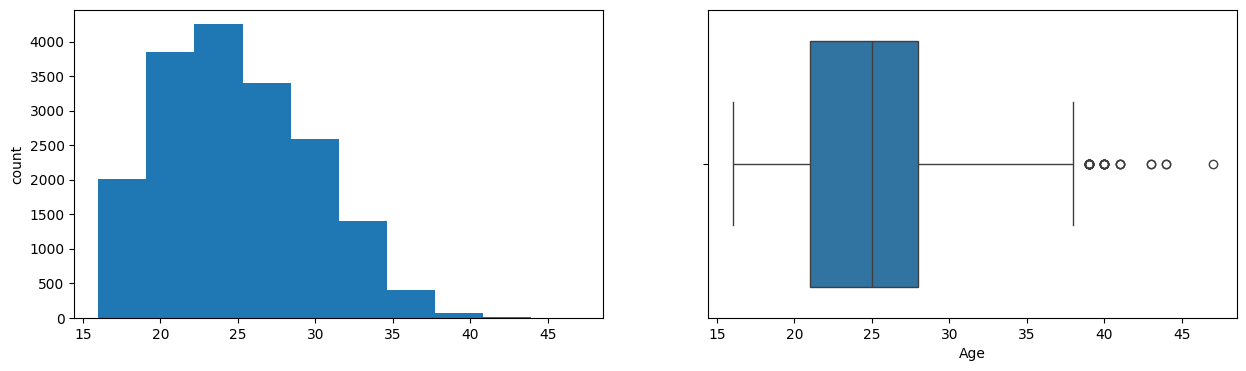

Overall
Skew : 0.01


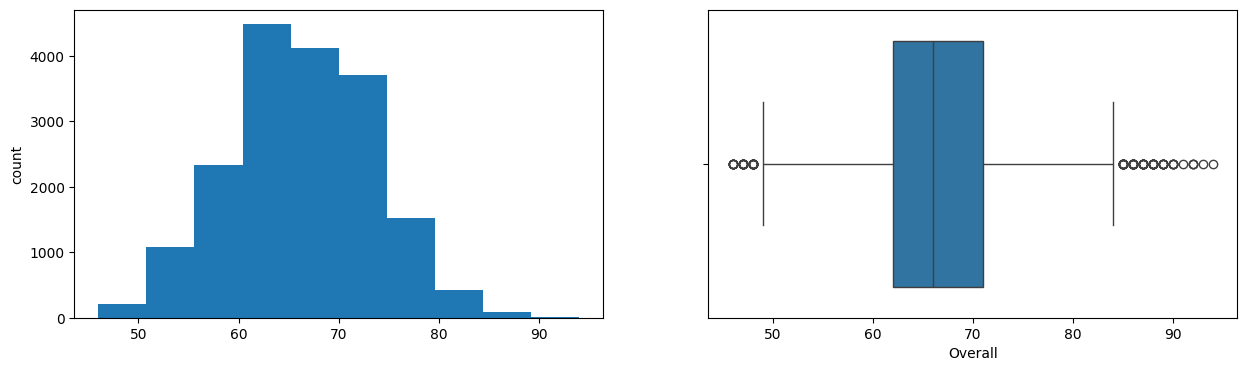

Potential
Skew : 0.21


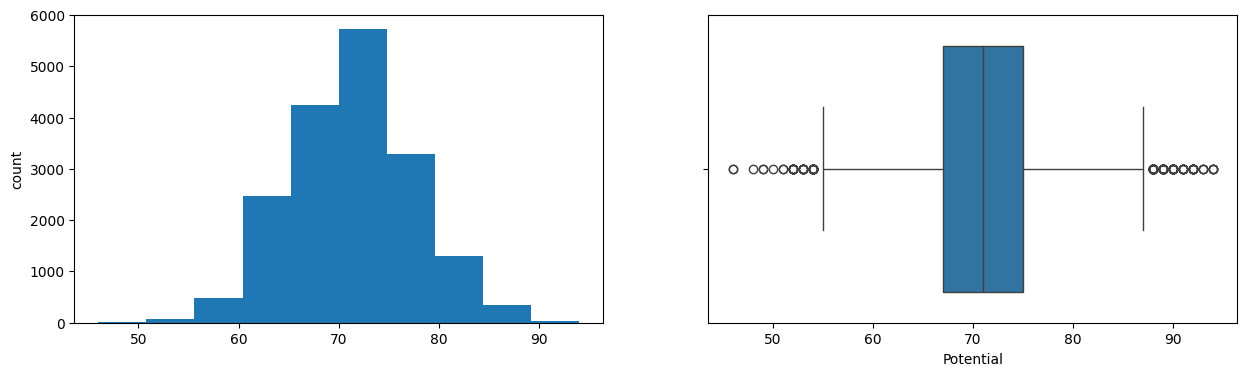

Value
Skew : 7.08


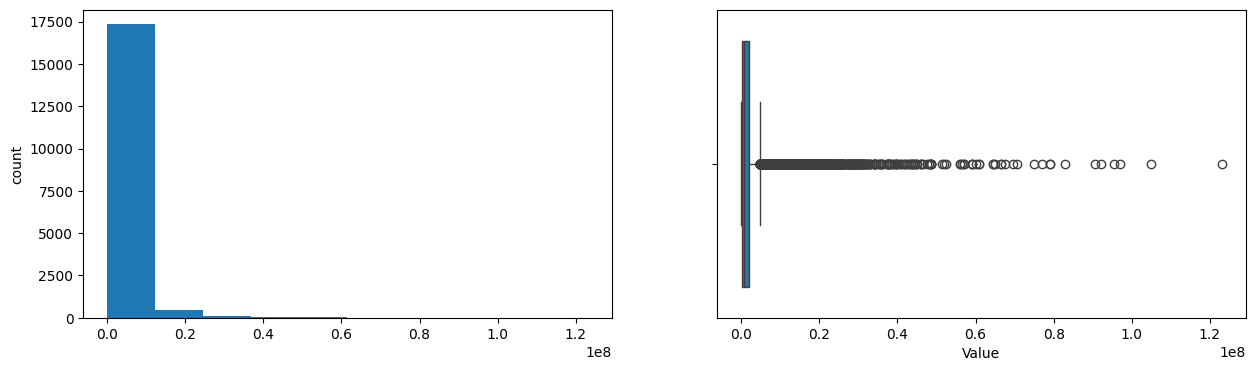

Wage
Skew : 7.05


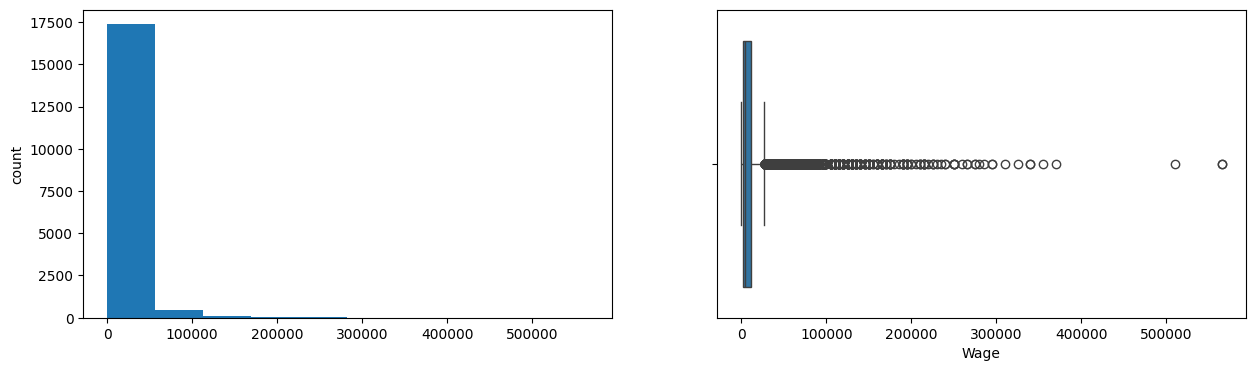

Special
Skew : -0.68


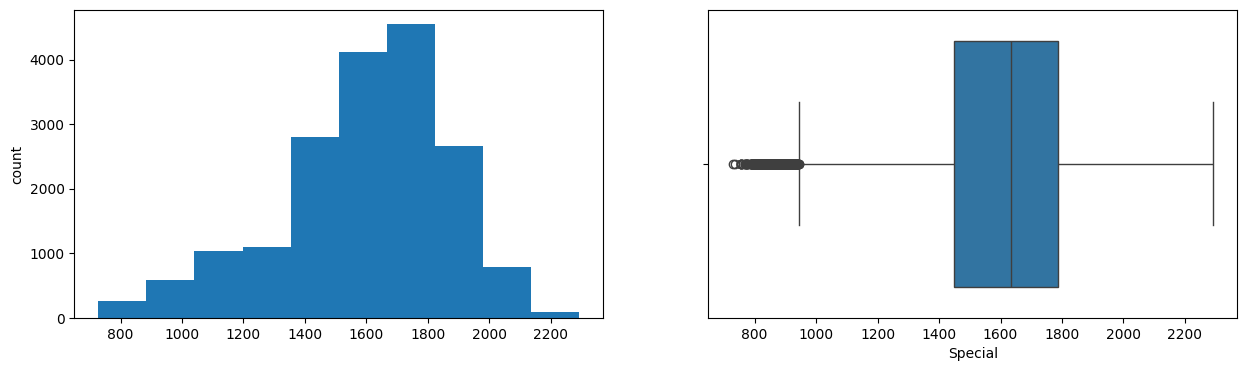

Acceleration
Skew : -0.79


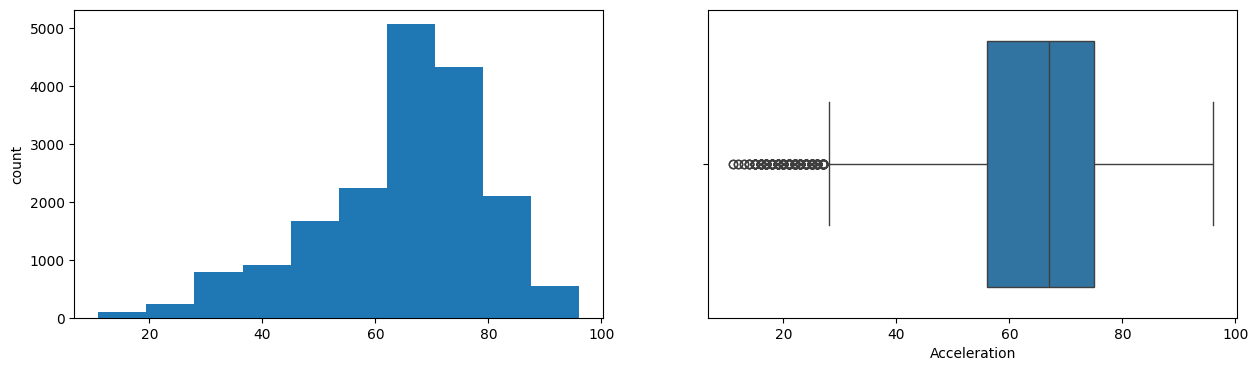

Aggression
Skew : -0.4


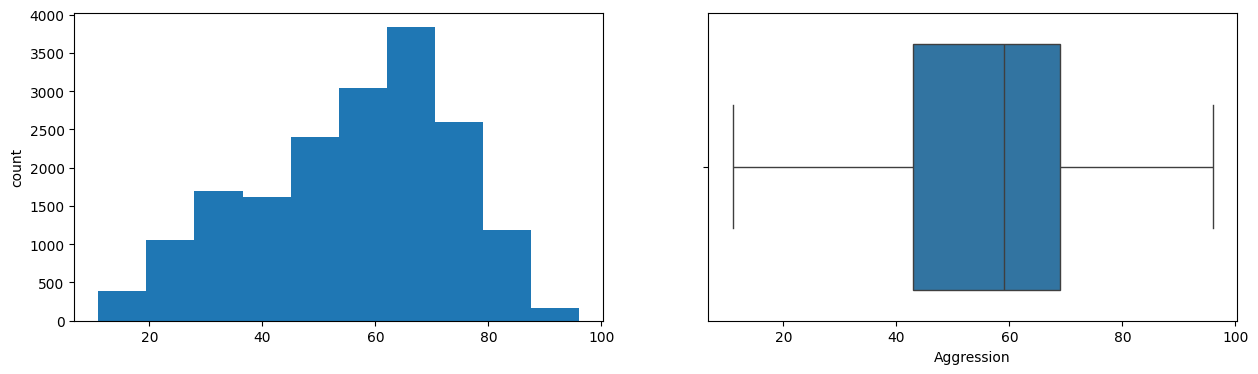

Agility
Skew : -0.57


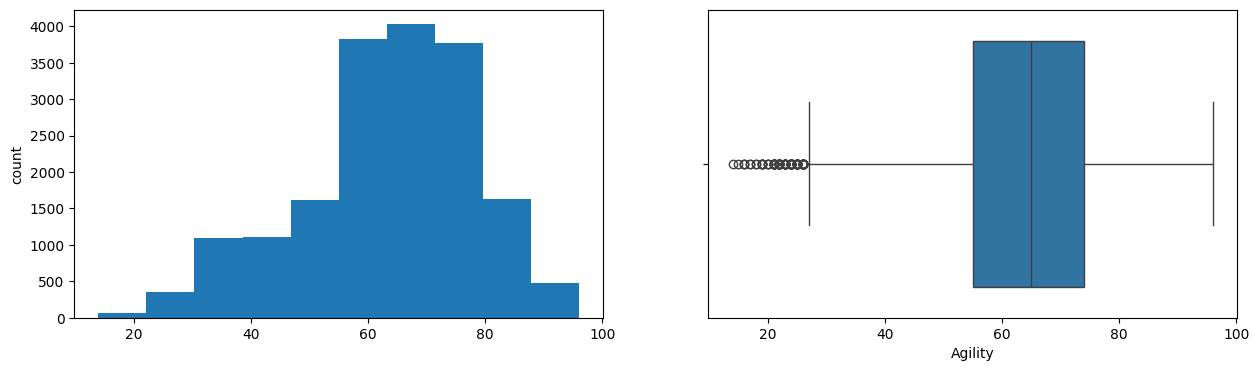

Balance
Skew : -0.55


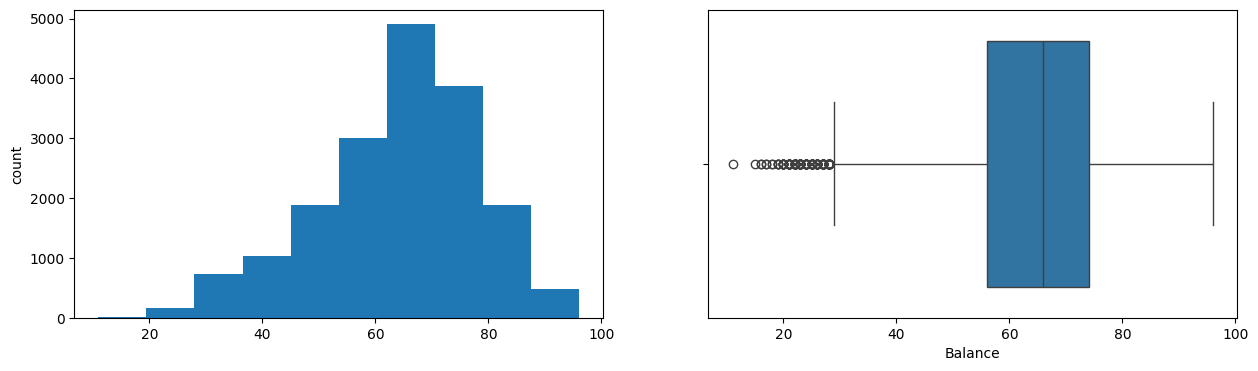

Ball control
Skew : -1.22


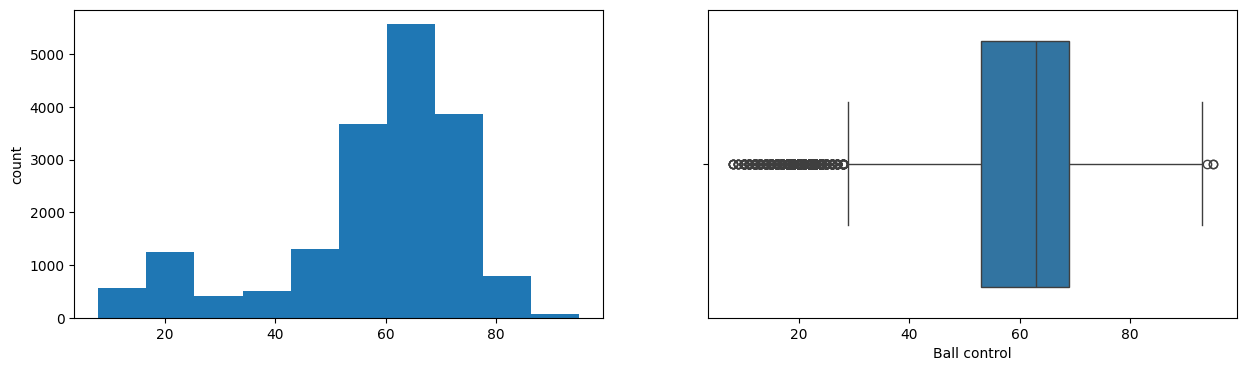

Composure
Skew : -0.71


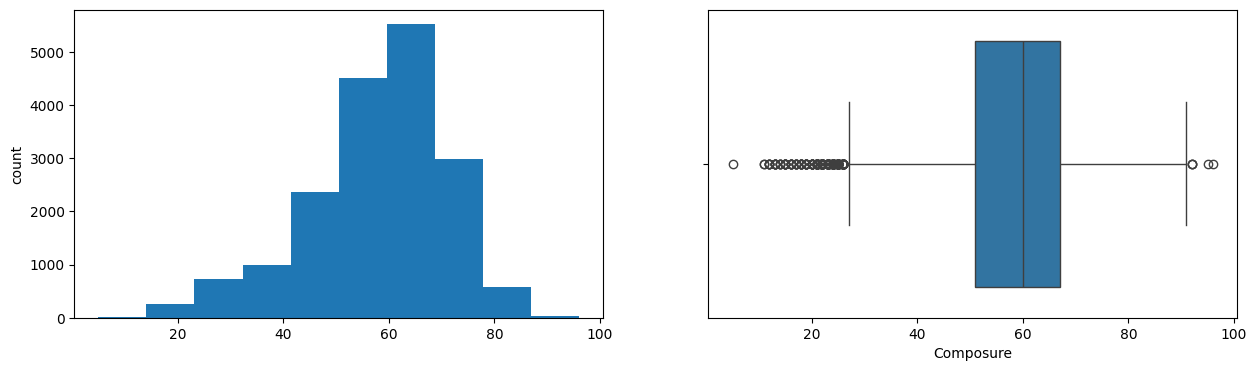

Crossing
Skew : -0.59


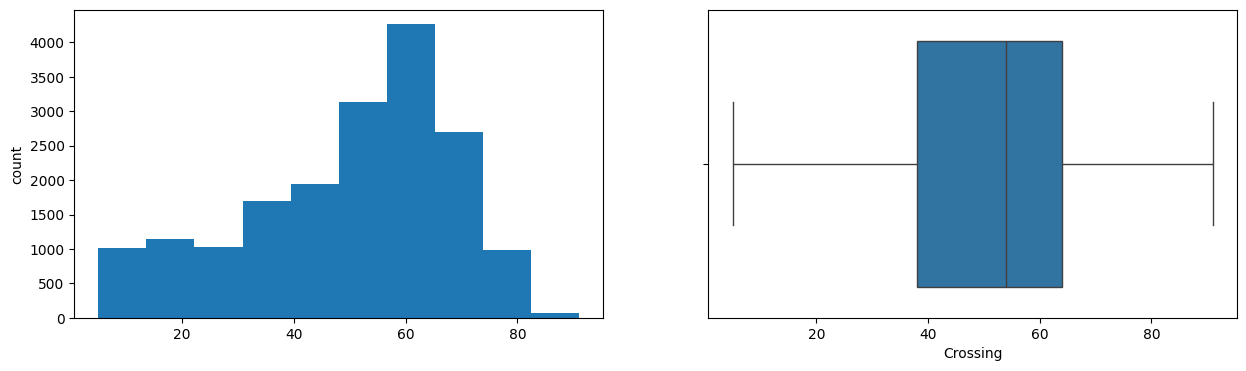

Curve
Skew : -0.24


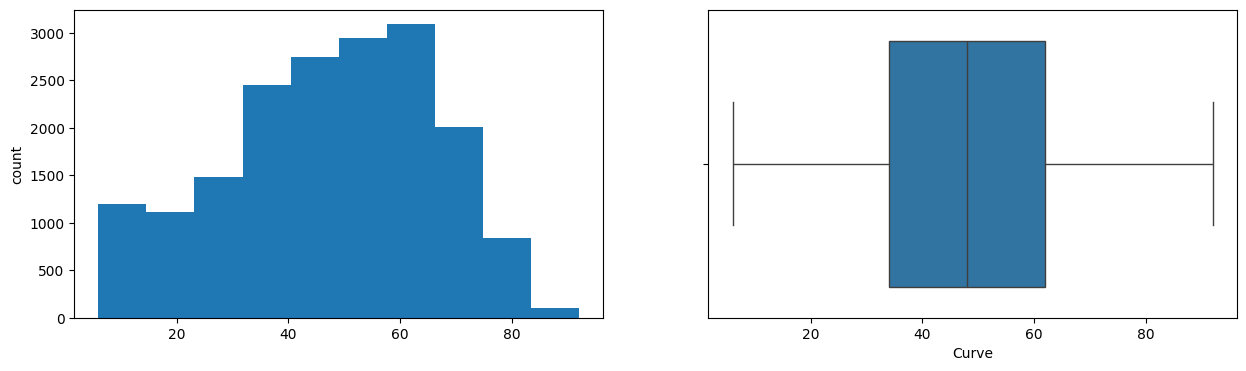

Dribbling
Skew : -1.03


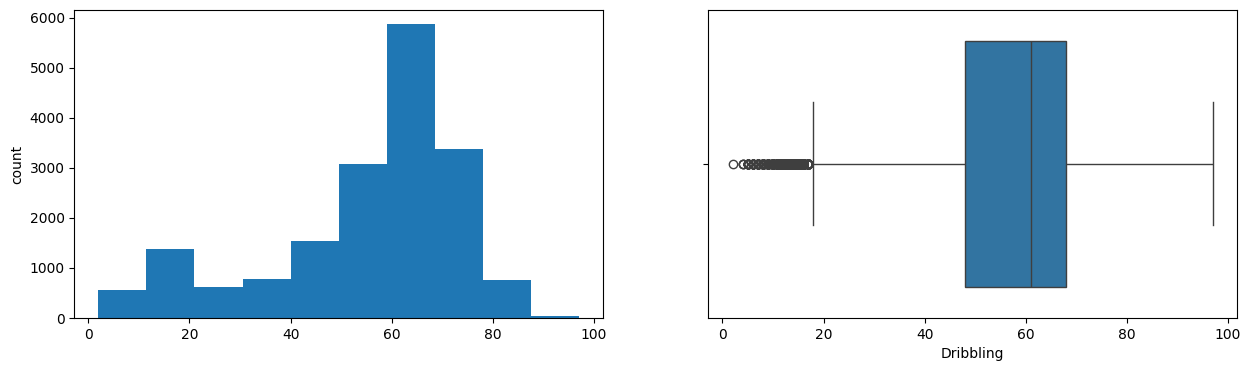

Finishing
Skew : -0.27


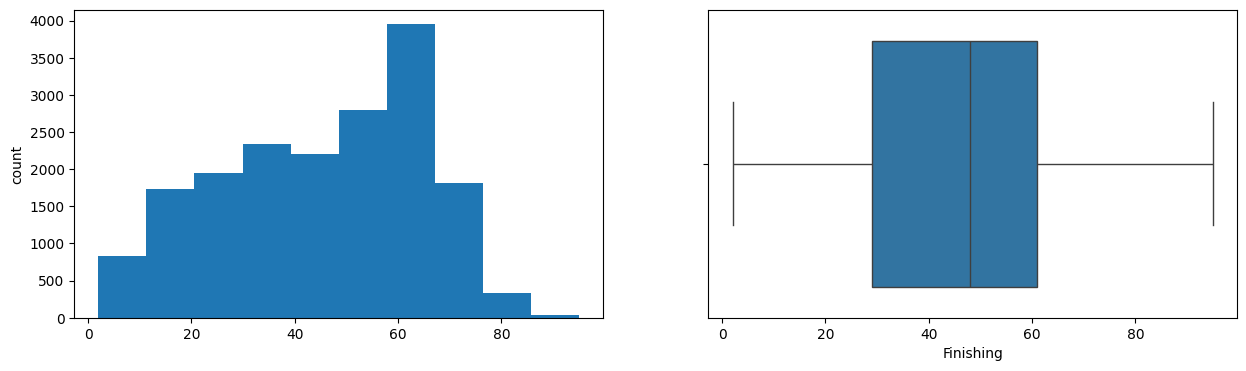

Free kick accuracy
Skew : 0.07


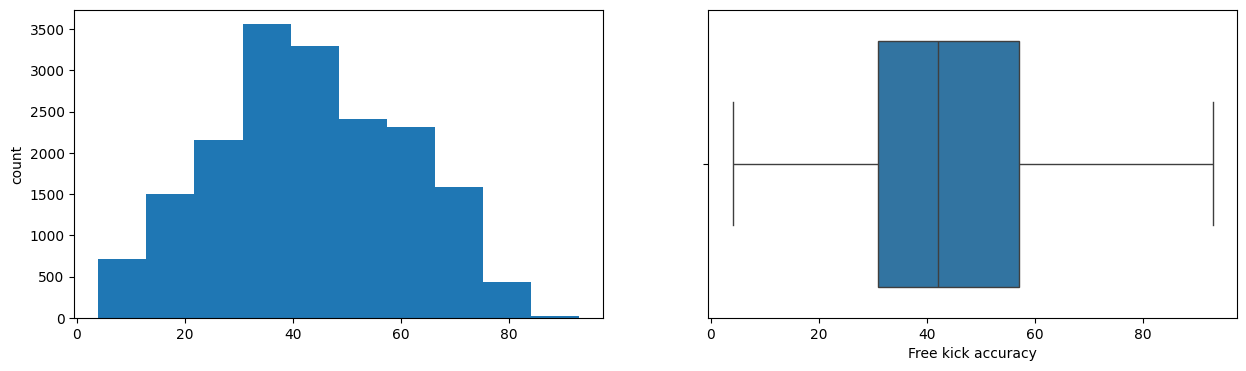

GK diving
Skew : 2.42


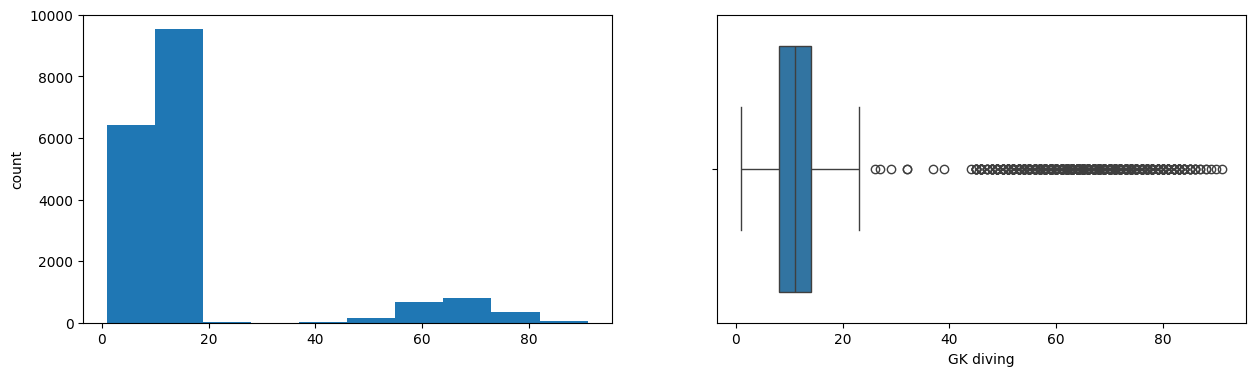

GK handling
Skew : 2.42


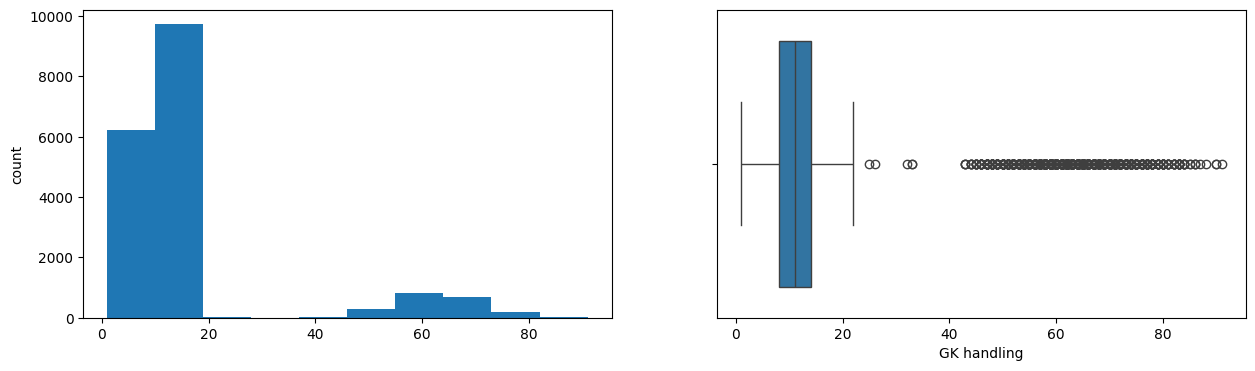

GK kicking
Skew : 2.41


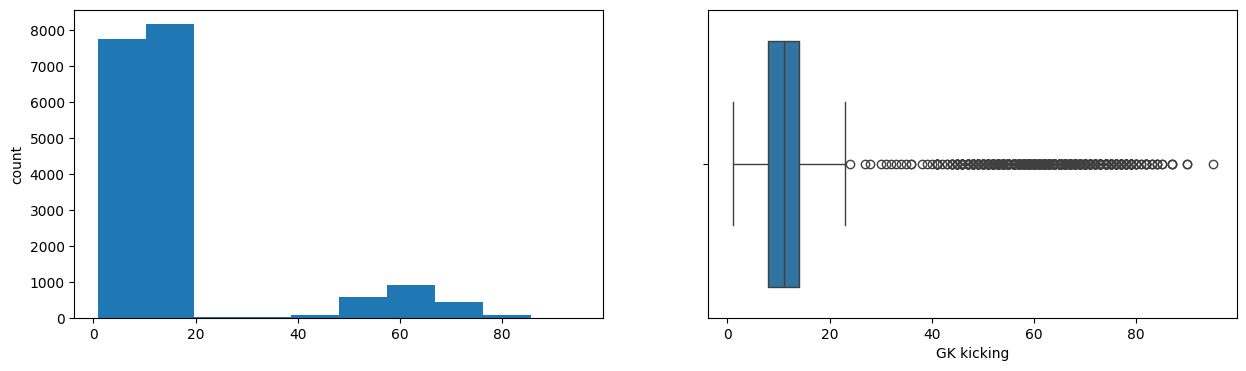

GK positioning
Skew : 2.44


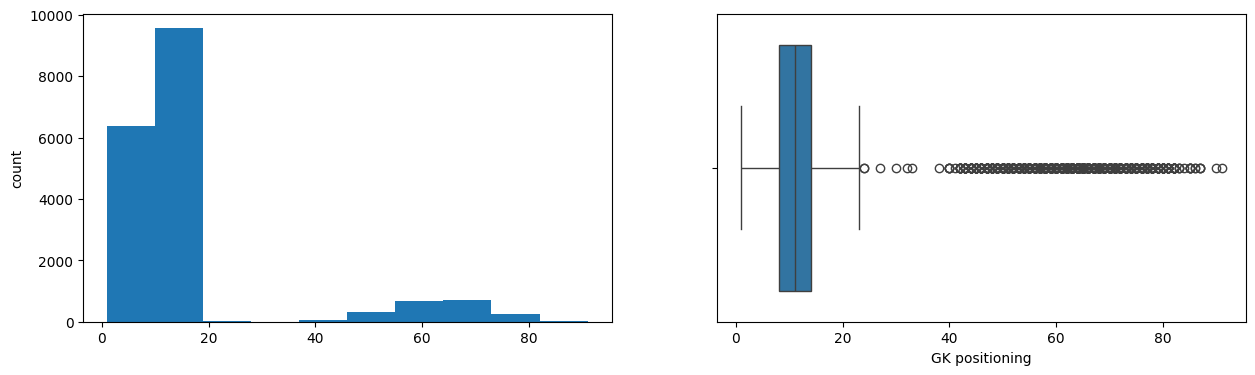

GK reflexes
Skew : 2.43


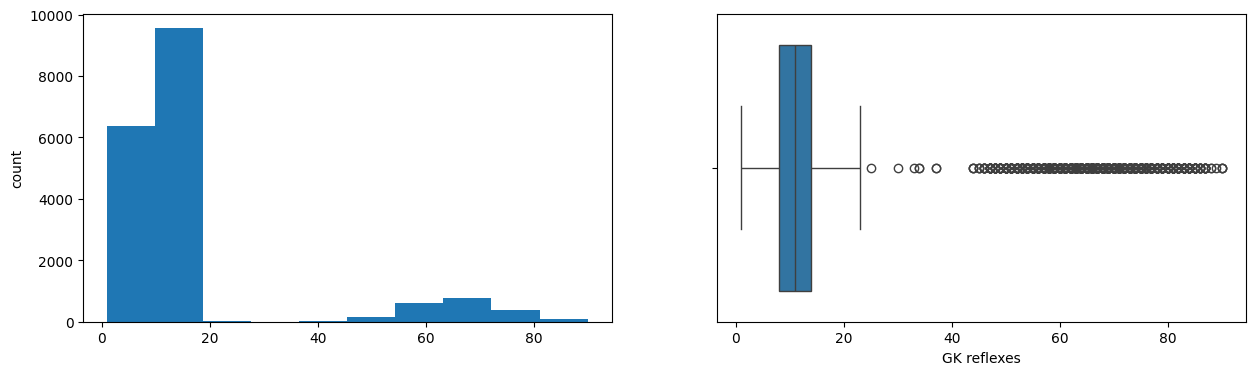

Heading accuracy
Skew : -0.88


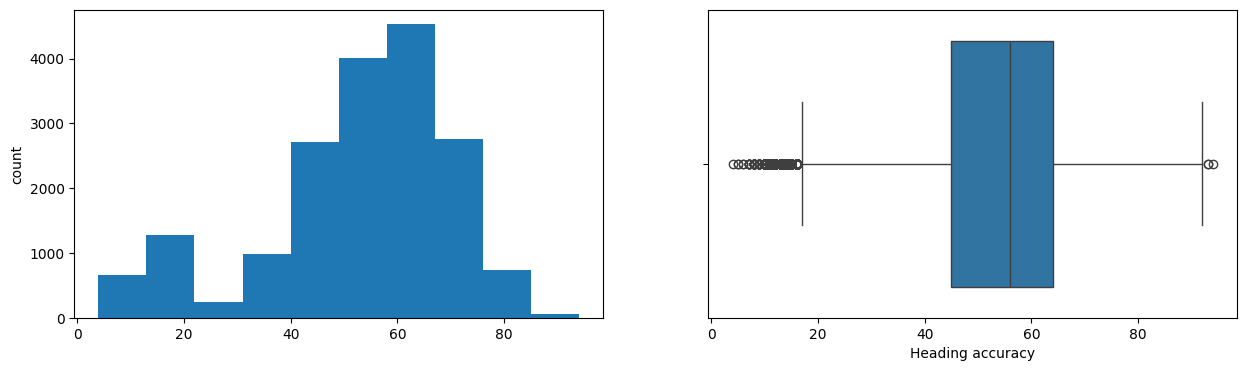

Interceptions
Skew : -0.23


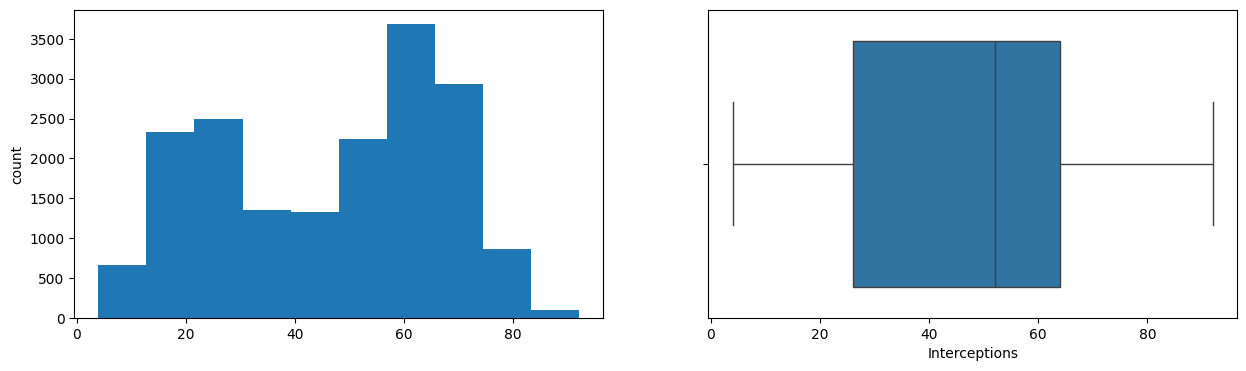

Jumping
Skew : -0.44


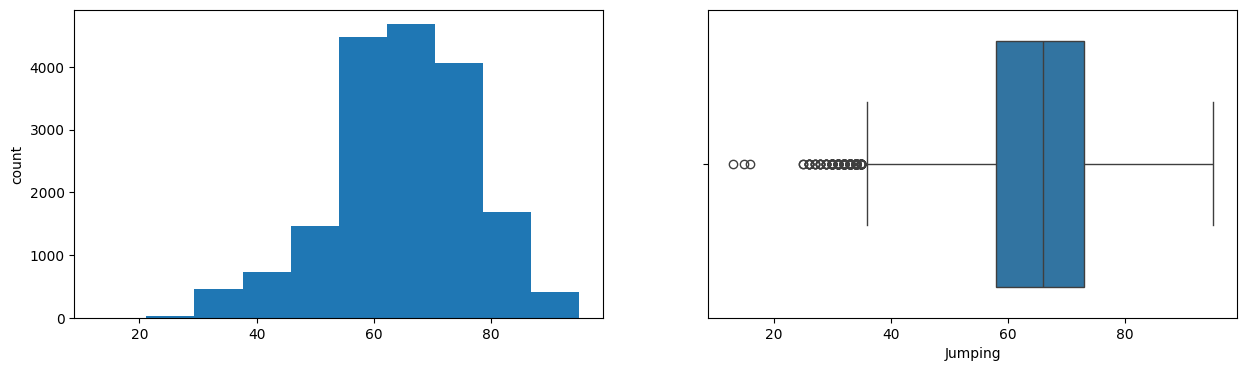

Long passing
Skew : -0.56


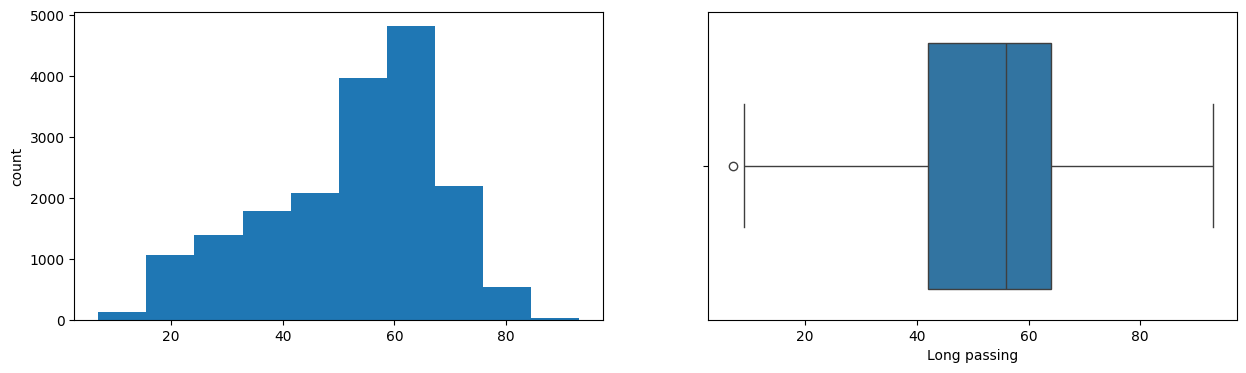

Long shots
Skew : -0.42


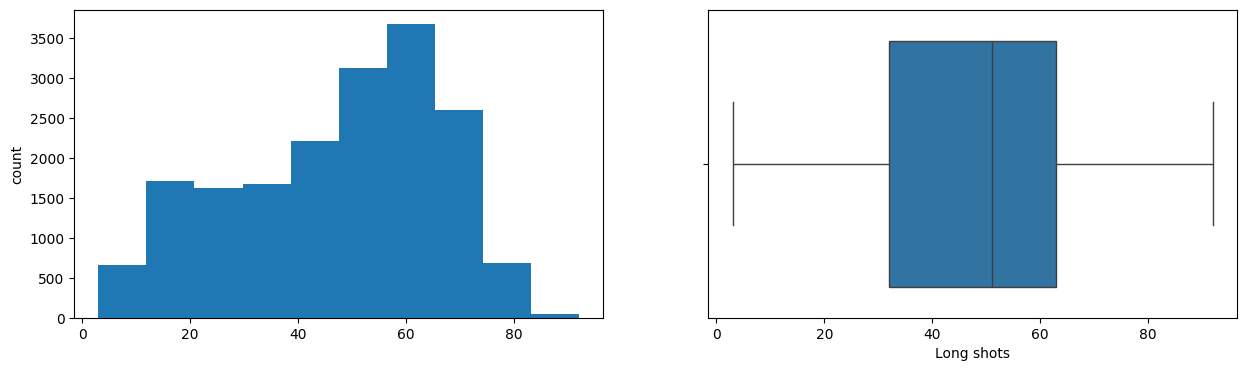

Marking
Skew : -0.17


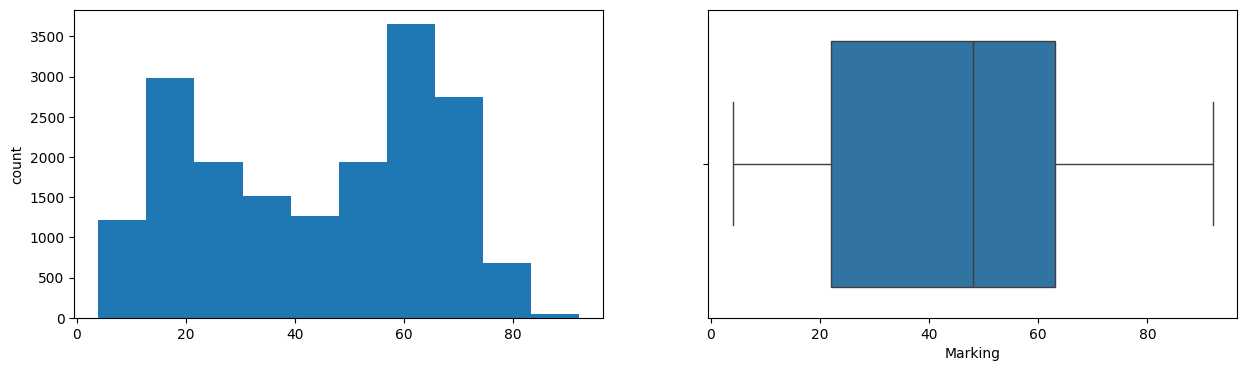

Penalties
Skew : -0.38


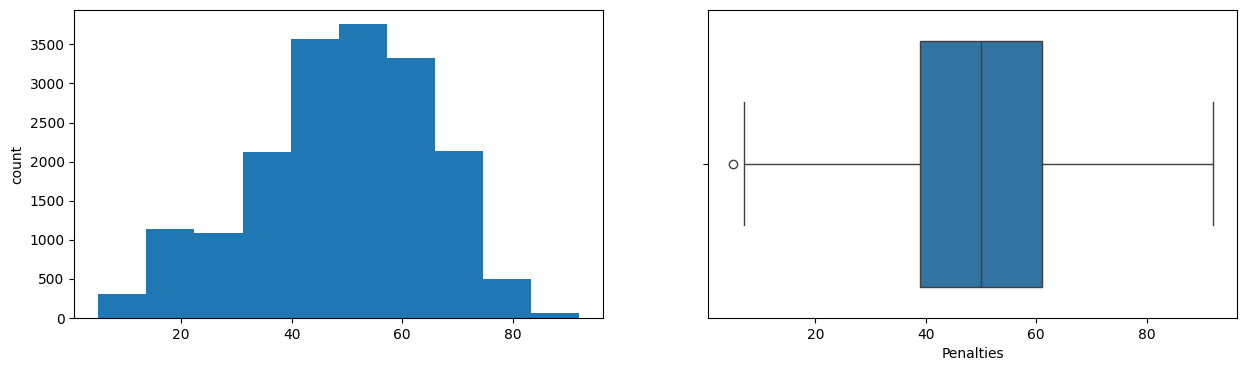

Positioning
Skew : -0.68


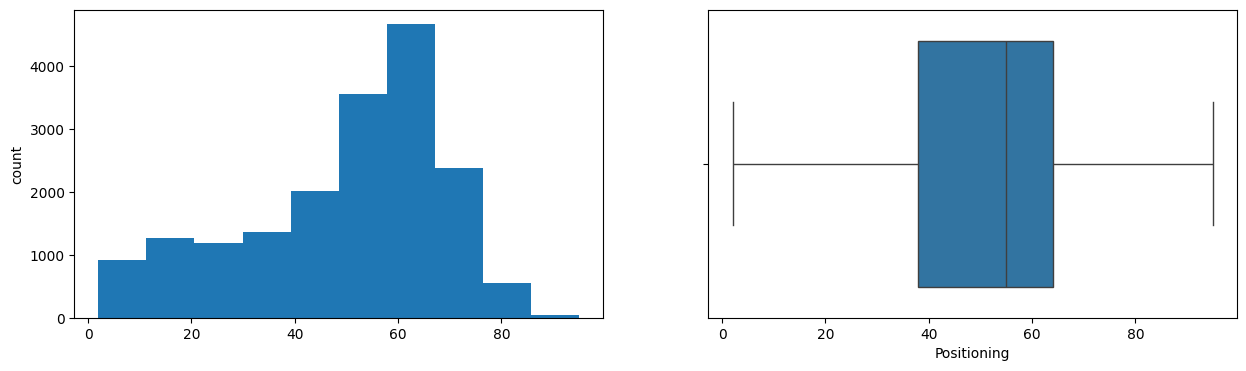

Reactions
Skew : -0.13


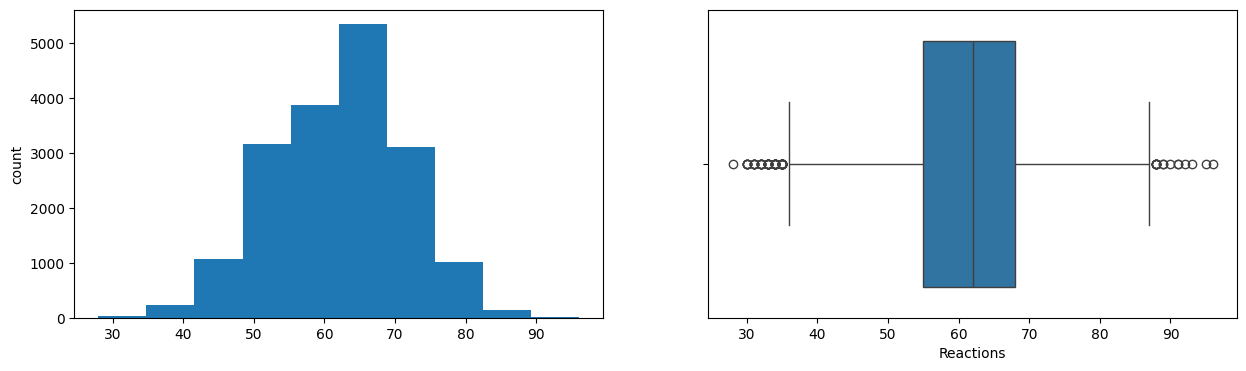

Short passing
Skew : -1.05


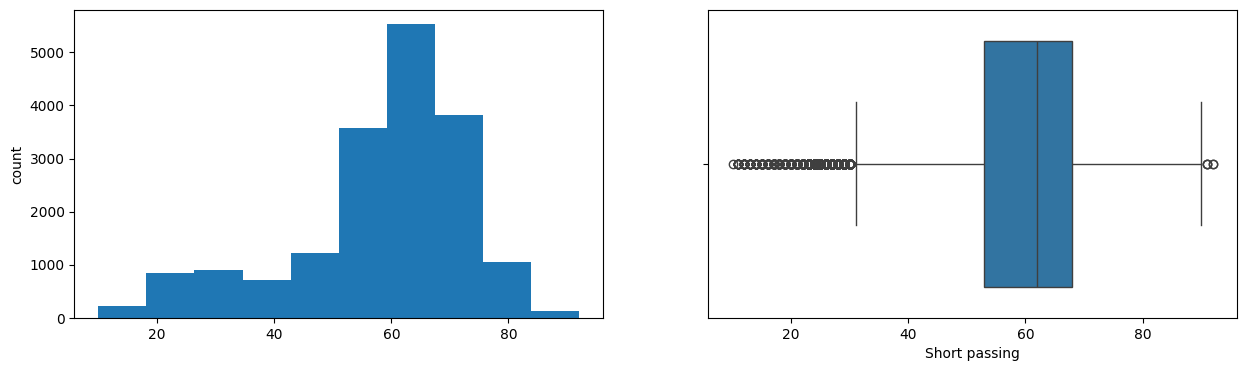

Shot power
Skew : -0.69


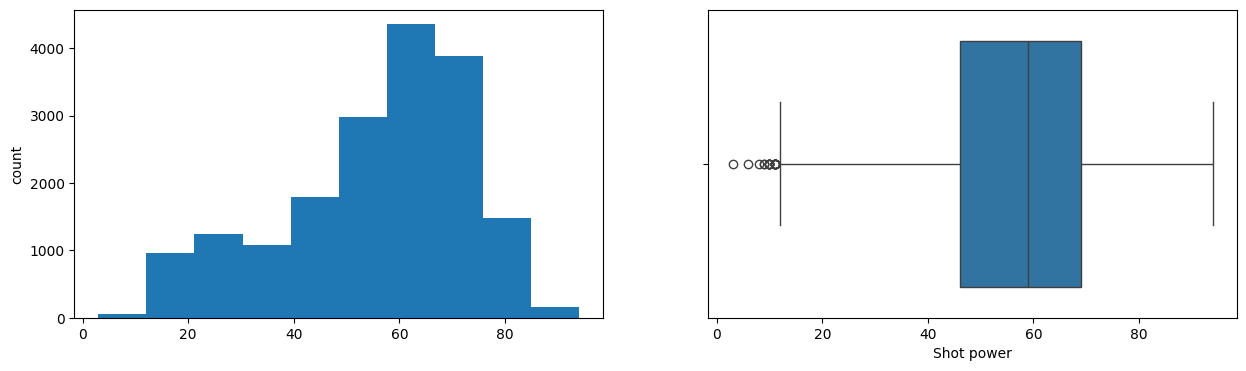

Sliding tackle
Skew : -0.23


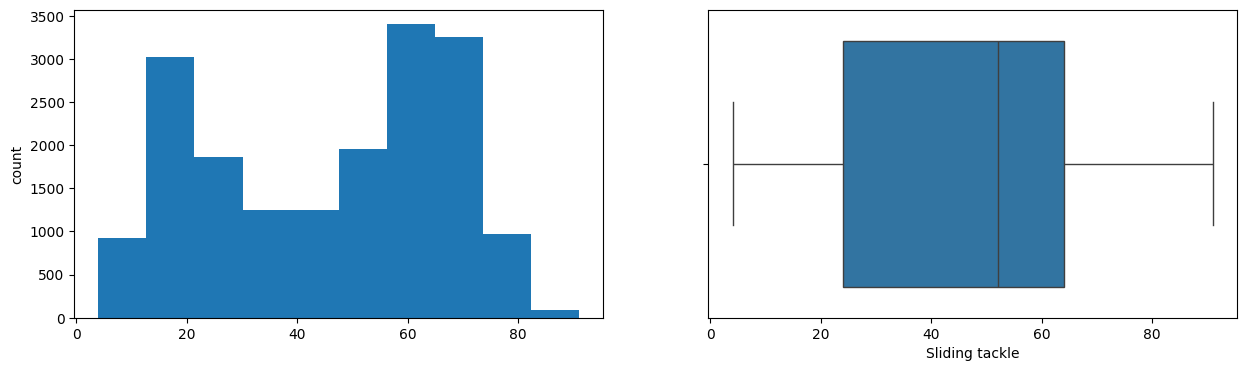

Sprint speed
Skew : -0.82


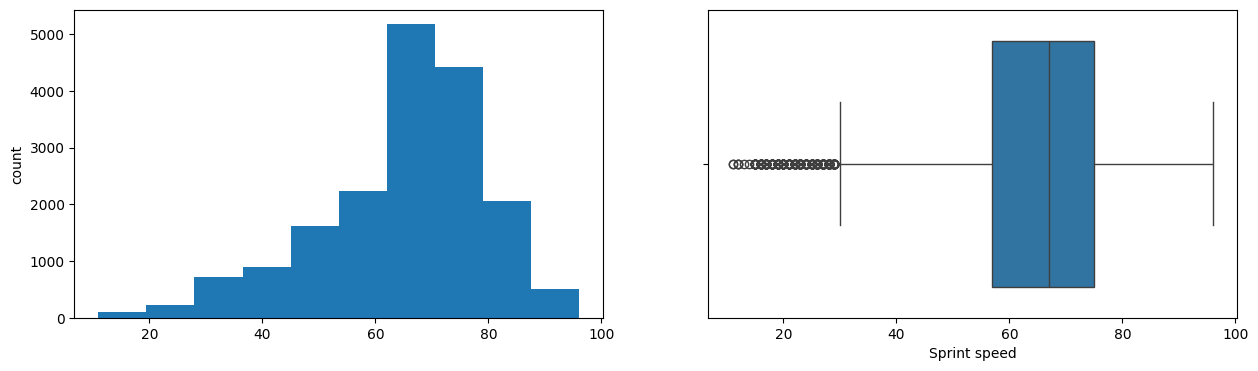

Stamina
Skew : -0.9


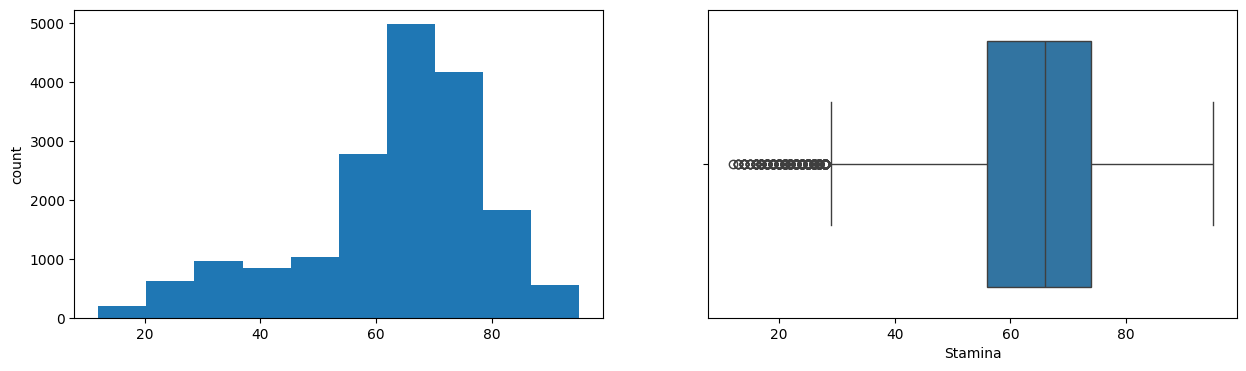

Standing tackle
Skew : -0.3


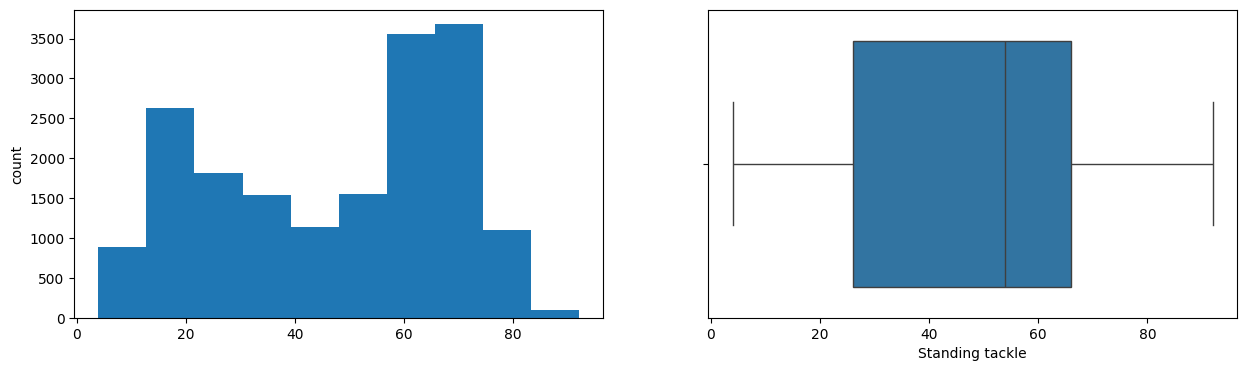

Strength
Skew : -0.45


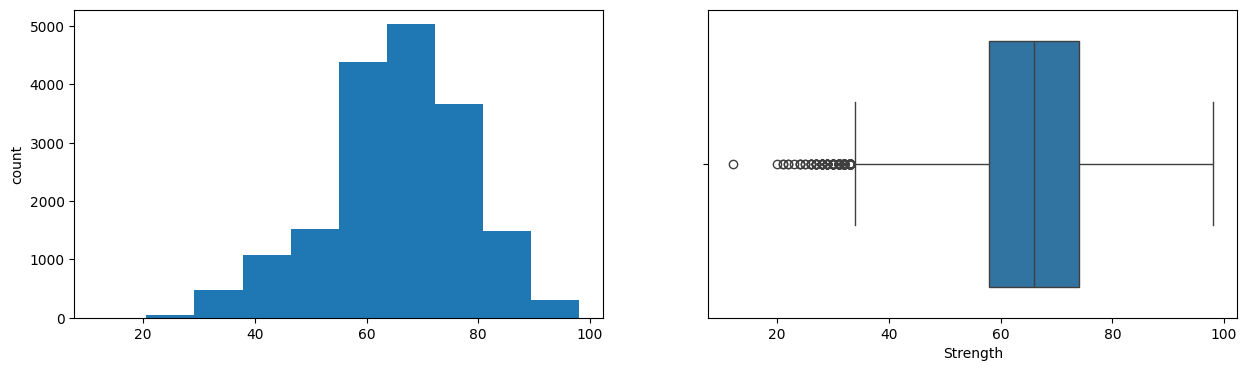

Vision
Skew : -0.35


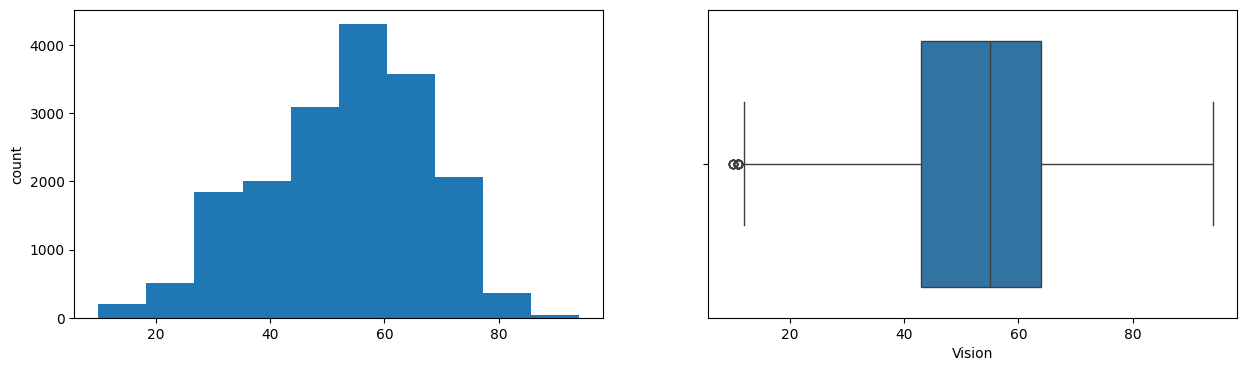

Volleys
Skew : -0.16


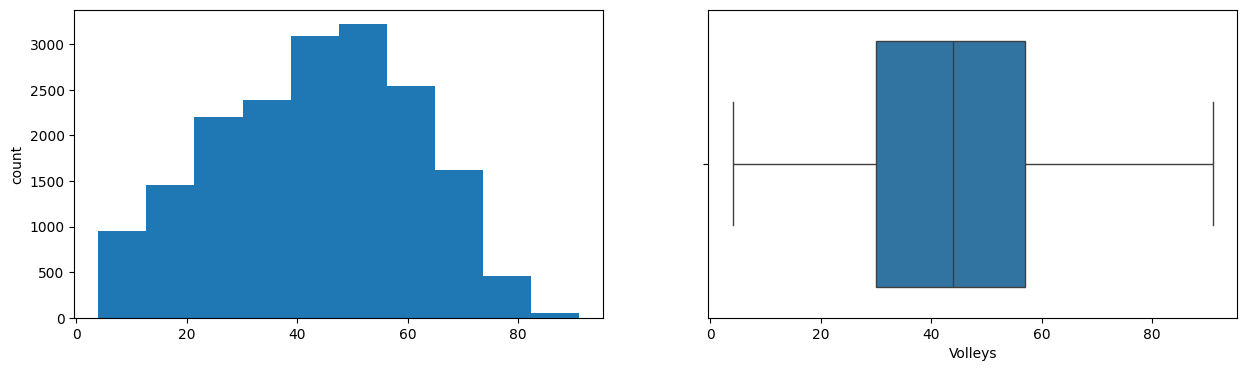

In [42]:
for col in num_cols:
    print(col)
    print('Skew :', round(players_data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    players_data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=players_data[col])
    plt.show()

[<Axes: > <Axes: >]


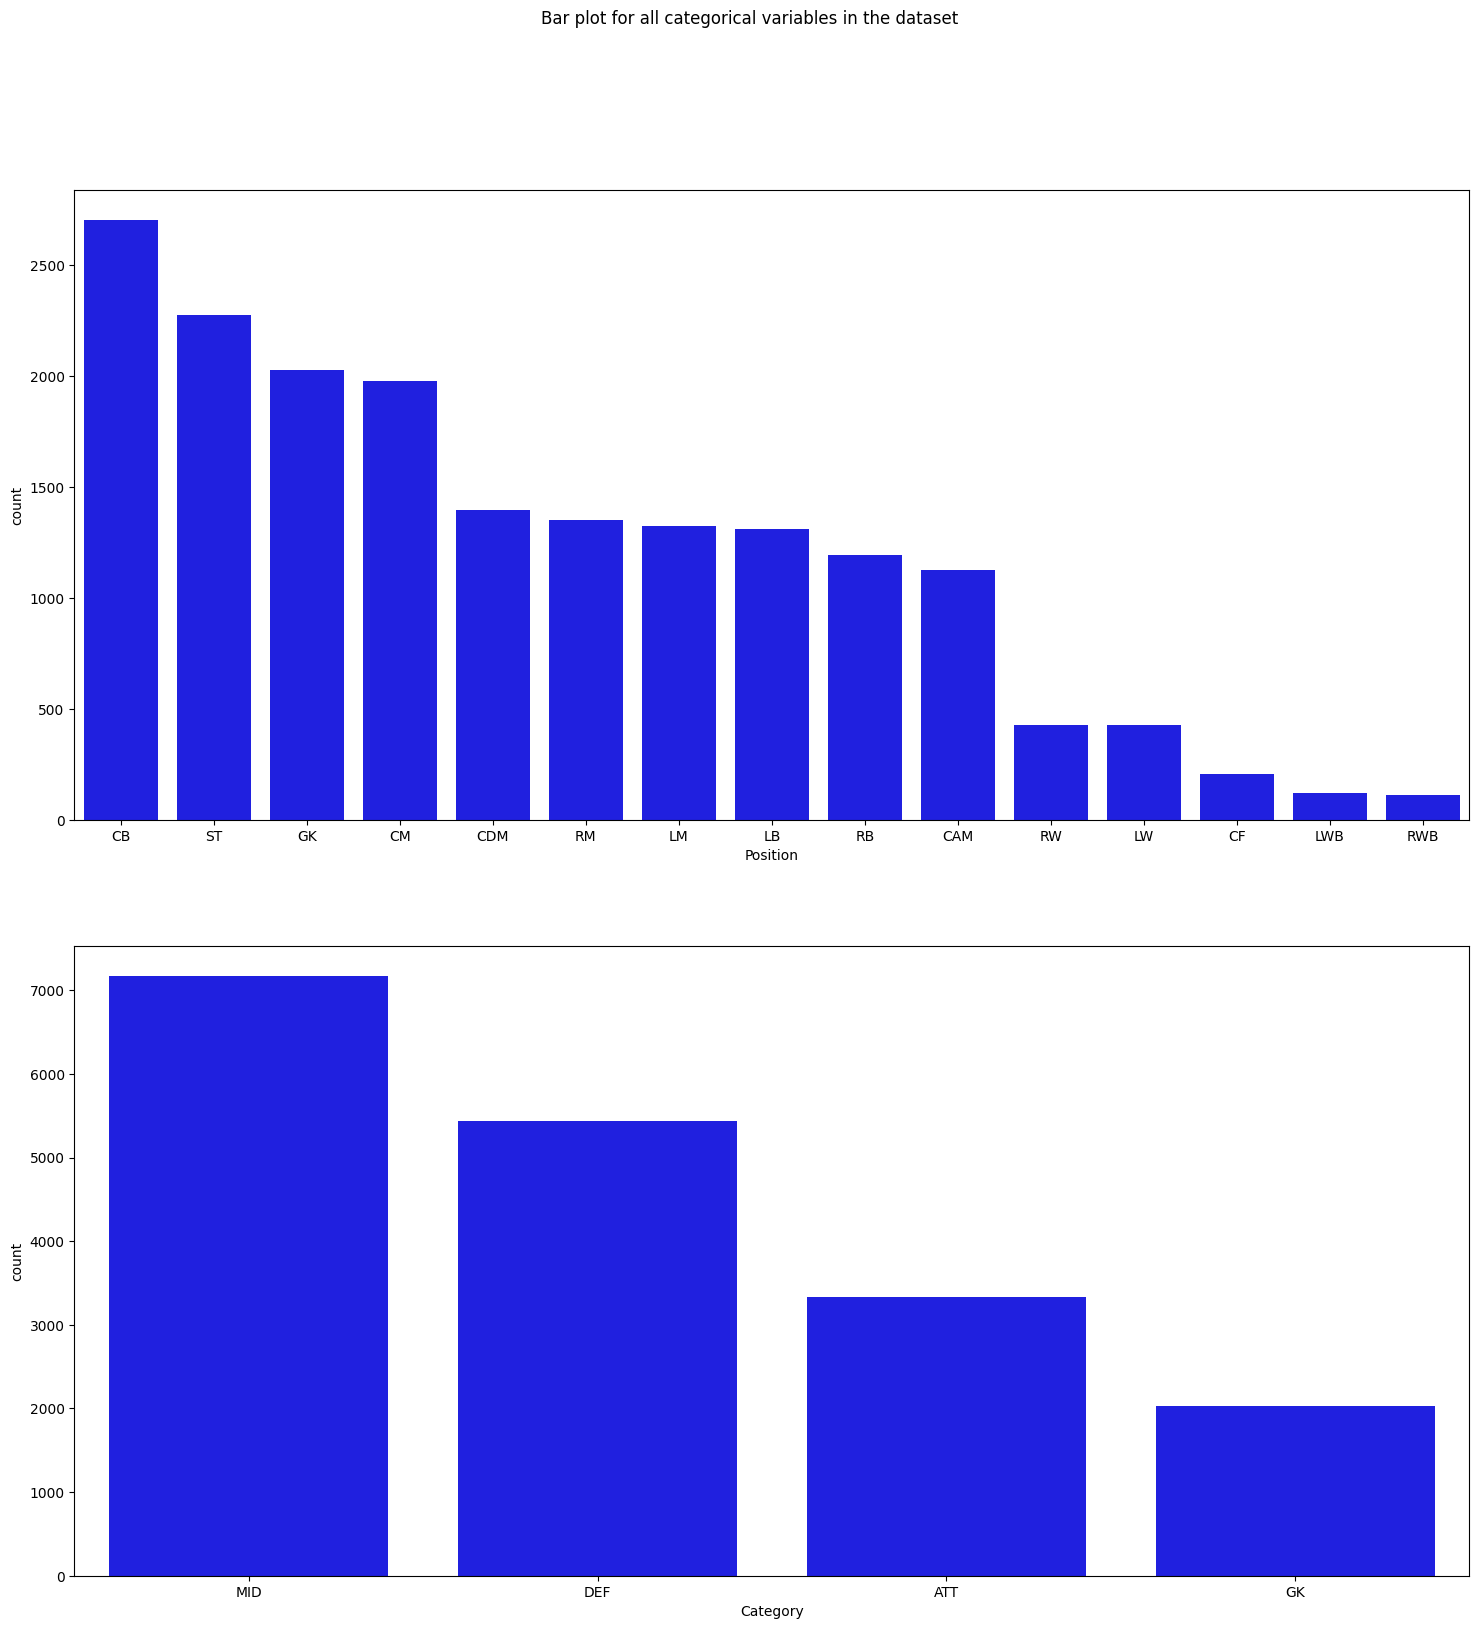

In [43]:
fig, axes = plt.subplots(2, 1, figsize = (18, 18))
print(axes)
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0], x = 'Position', data = players_data, color = 'blue', 
              order = players_data['Position'].value_counts().index);
sns.countplot(ax = axes[ 1], x = 'Category', data = players_data, color = 'blue', 
              order = players_data['Category'].value_counts().index);


# Log Tranformation of Value and Wage 

In [47]:
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])


In [48]:
data=players_data[(players_data.Wage!=0)&(players_data.Value!=0)]

In [49]:
log_transform(data,['Value','Wage'])

C:\Users\jimv6\AppData\Local\Temp\ipykernel_17948\4004245017.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colname + '_log'] = np.log(data[colname])
C:\Users\jimv6\AppData\Local\Temp\ipykernel_17948\4004245017.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colname + '_log'] = np.log(data[colname])


C:\Users\jimv6\AppData\Local\Temp\ipykernel_17948\3647680740.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Value_log"], axlabel="Value_Log");


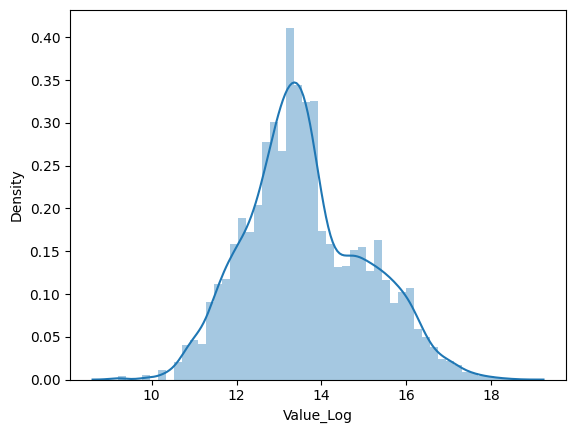

In [67]:
sns.distplot(data["Value_log"], axlabel="Value_Log");


C:\Users\jimv6\AppData\Local\Temp\ipykernel_17948\3990961326.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Wage_log"], axlabel="Wage_Log");


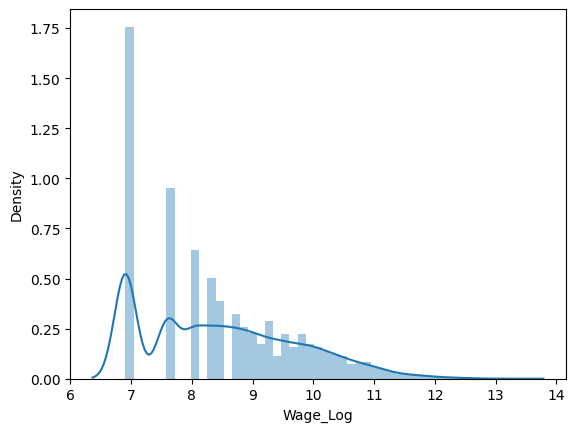

In [68]:

sns.distplot(data["Wage_log"], axlabel="Wage_Log");

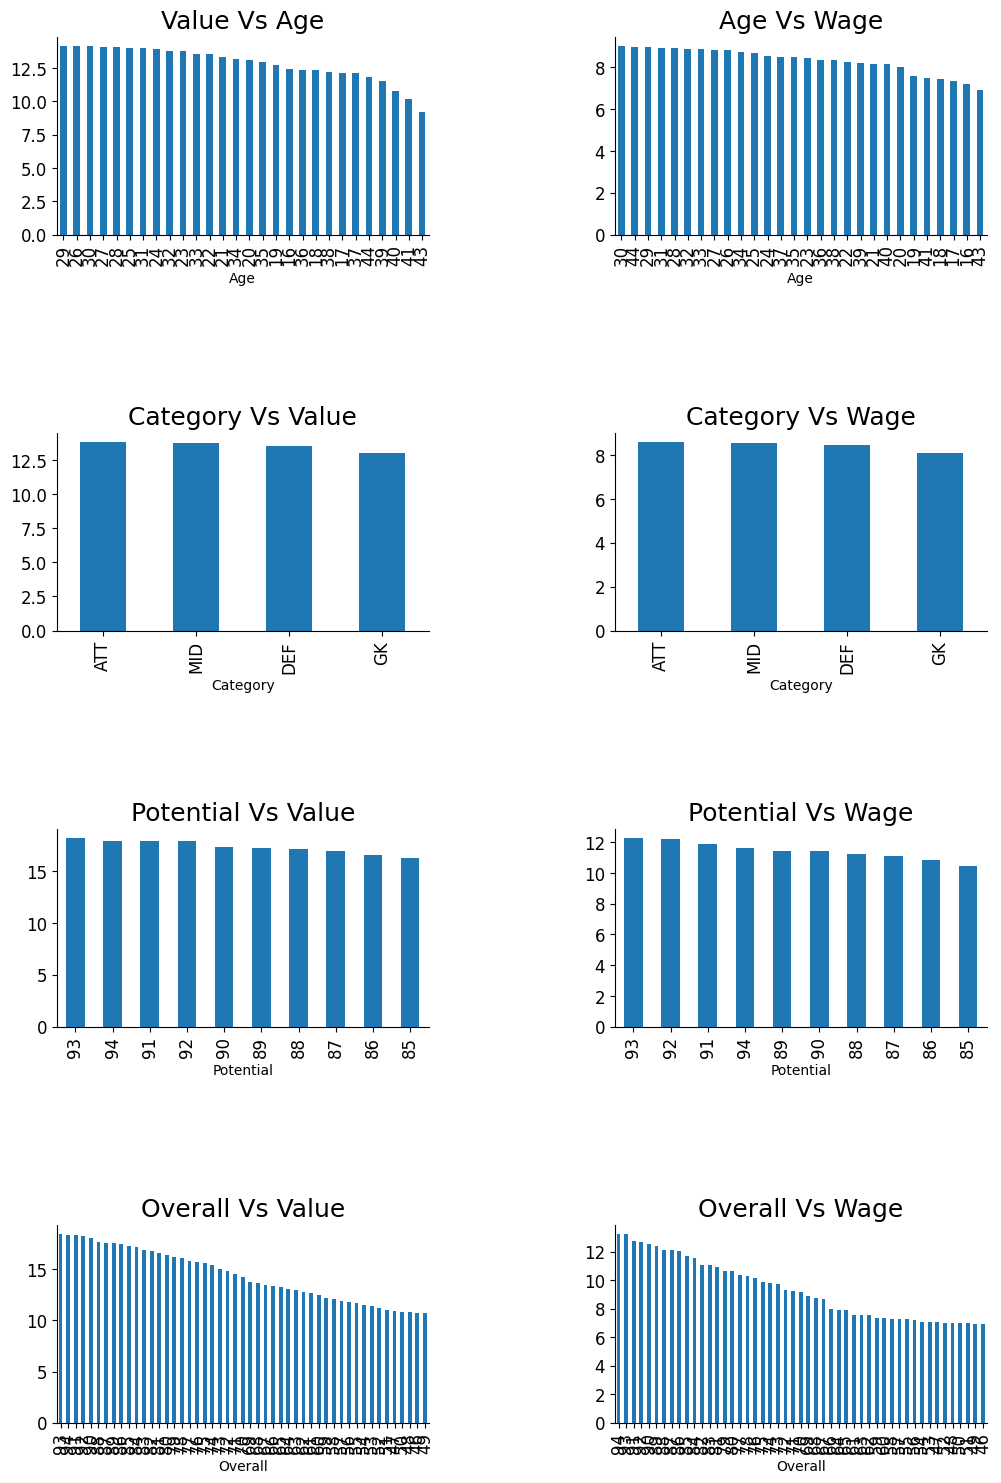

In [69]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Age')['Value_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Value Vs Age", fontsize=18)
data.groupby('Age')['Wage_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Age Vs Wage", fontsize=18)
data.groupby('Category')['Value_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Category Vs Value", fontsize=18)
data.groupby('Category')['Wage_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Category Vs Wage", fontsize=18)
data.groupby('Potential')['Value_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Potential Vs Value", fontsize=18)
data.groupby('Potential')['Wage_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Potential Vs Wage", fontsize=18)
data.groupby('Overall')['Value_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Overall Vs Value", fontsize=18)
data.groupby('Overall')['Wage_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Overall Vs Wage", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

In [71]:
players_data.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Position', 'Category'],
      dtype='object')

In [75]:
plt.figure(figsize=(100, 100))
sns.heatmap(players_data.drop(['Position','Category',],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [74]:
players_data.drop(['Position','Category',],axis=1).corr()

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Age,1.000000,0.459765,-0.218264,0.079309,0.150006,0.238667,-0.152360,0.264230,-0.018748,-0.087471,...,0.460826,0.130914,0.149648,0.107270,-0.142021,0.085539,0.125523,0.317417,0.189895,0.133448
Overall,0.459765,1.000000,0.683474,0.626001,0.593789,0.604092,0.204208,0.398523,0.265458,0.096650,...,0.840578,0.488375,0.427811,0.220051,0.221671,0.356190,0.251105,0.352294,0.481185,0.378624
Potential,-0.218264,0.683474,1.000000,0.588074,0.519062,0.399511,0.244777,0.188953,0.233688,0.133937,...,0.520029,0.371326,0.291052,0.132984,0.253069,0.222317,0.148793,0.108855,0.341213,0.256449
Value,0.079309,0.626001,0.588074,1.000000,0.850510,0.376629,0.176705,0.187013,0.201782,0.105964,...,0.531255,0.323913,0.280434,0.083657,0.181717,0.211665,0.103378,0.140364,0.345148,0.287611
Wage,0.150006,0.593789,0.519062,0.850510,1.000000,0.367419,0.146776,0.206926,0.174240,0.085943,...,0.502202,0.308240,0.272138,0.116123,0.154389,0.203396,0.131134,0.165548,0.317941,0.268522
Special,0.238667,0.604092,0.399511,0.376629,0.367419,1.000000,0.649445,0.667080,0.690667,0.578269,...,0.587610,0.903003,0.829589,0.511117,0.647115,0.791288,0.538780,0.189248,0.754142,0.762909
Acceleration,-0.152360,0.204208,0.244777,0.176705,0.146776,0.649445,1.000000,0.251775,0.798994,0.701170,...,0.191965,0.561425,0.536658,0.155162,0.915770,0.607153,0.154651,-0.161958,0.456469,0.568122
Aggression,0.264230,0.398523,0.188953,0.187013,0.206926,0.667080,0.251775,1.000000,0.235017,0.182923,...,0.395601,0.596585,0.494836,0.709404,0.284047,0.644517,0.732811,0.463967,0.296788,0.318797
Agility,-0.018748,0.265458,0.233688,0.201782,0.174240,0.690667,0.798994,0.235017,1.000000,0.765775,...,0.278791,0.610704,0.565988,0.105772,0.753308,0.561617,0.111538,-0.243287,0.591396,0.622262
Balance,-0.087471,0.096650,0.133937,0.105964,0.085943,0.578269,0.701170,0.182923,0.765775,1.000000,...,0.138629,0.535376,0.452206,0.150808,0.635770,0.470025,0.144637,-0.404072,0.487387,0.510744
